# Cifar dataset

# Image classification

### -Cifar- 60k 32*32of 10 classes
- Airplane
- Automobile
- Horse
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR libraries

In [105]:
# Load data and divide into train and test
(train_image,train_labels),(test_image, test_labels)= cifar10.load_data()

In [107]:
# Normalize the pixels values to range[0,1]
train_image, test_image= train_image/255.0, test_image/255.0
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [109]:
# One hot encoding
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [111]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# Create a CNN - DEEP Learning

In [114]:
model=models.Sequential([
    #Convolution Layer
    layers.Conv2D(32,(3,3), activation ='relu', input_shape=(32,32,3)), #32- Feature map , (3,3)-Matrix to run image, 3-3 colors
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation ='relu'), #no input as output of previous will be input of this 
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation ='relu'),
    
    # Flattening- Convert matrix to column
    layers.Flatten(),

    #Fully connected Layer- Hidden layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [118]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [120]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

# Train Model

In [124]:
history=model.fit(train_image, train_labels, epochs=20, validation_data=(test_image,test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.3523 - loss: 1.7545 - val_accuracy: 0.5614 - val_loss: 1.2112
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.5741 - loss: 1.1857 - val_accuracy: 0.6183 - val_loss: 1.0922
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6381 - loss: 1.0234 - val_accuracy: 0.6297 - val_loss: 1.0855
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6763 - loss: 0.9111 - val_accuracy: 0.6759 - val_loss: 0.9271
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7015 - loss: 0.8330 - val_accuracy: 0.6757 - val_loss: 0.9372
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7271 - loss: 0.7789 - val_accuracy: 0.6872 - val_loss: 0.9146
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7485 - loss: 0.7186 - val_accuracy: 0.7043 - val_loss: 0.8563
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7612 -

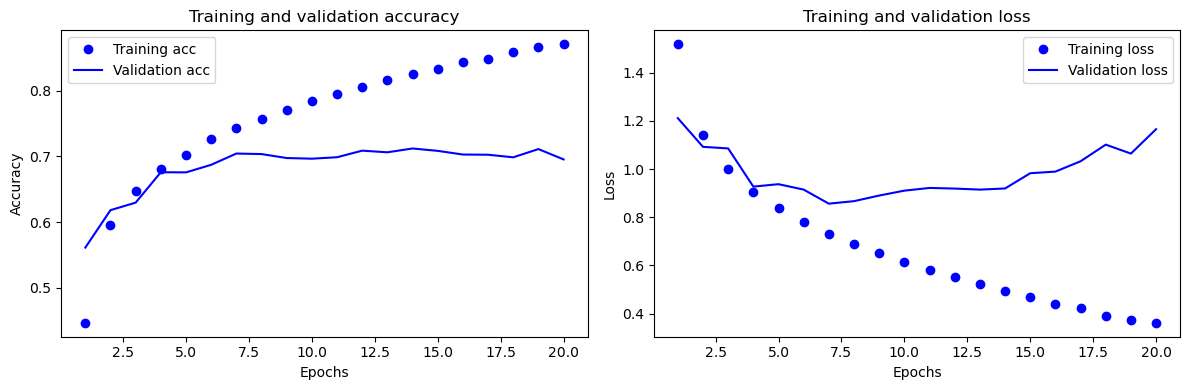

In [128]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


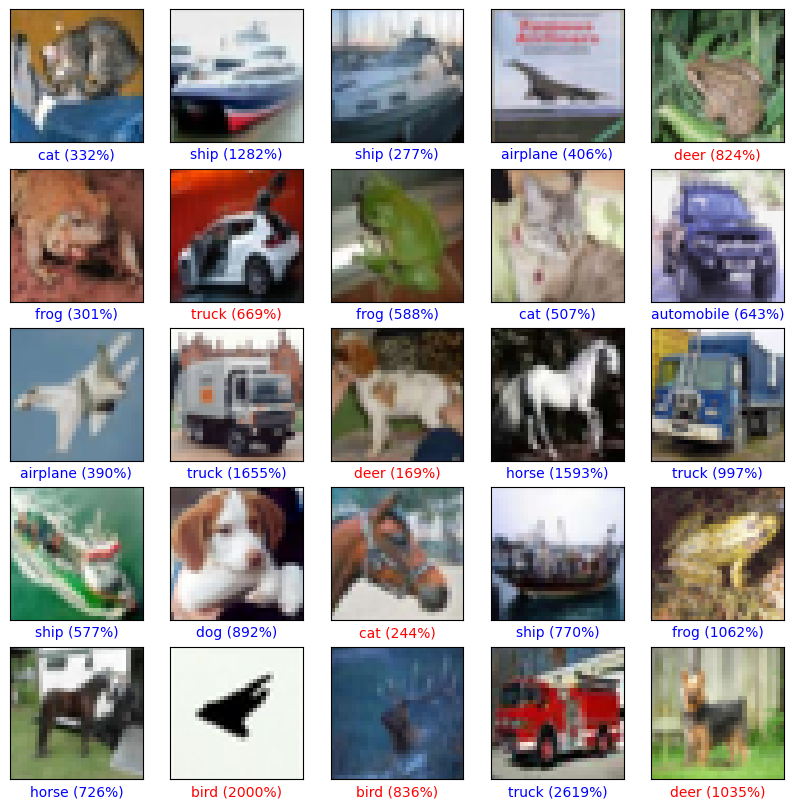

In [130]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_predictions():
    predictions = model.predict(test_image)
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid (False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_image[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions[i]):2.0f}%)", color=color)

# Call the function to plot example predictions
plot_example_predictions()